## Multivariable Stability analysis

In [1]:
import sympy
sympy.init_printing()
%matplotlib inline

In [2]:
s = sympy.Symbol('s')

This matrix is from example 16.2 in Seborg

In [3]:
Gp = sympy.Matrix([[2/(10*s + 1), sympy.Rational('1.5')/(s + 1)],
                   [sympy.Rational('1.5')/(s + 1), 2/(10*s + 1)]])
Gp

⎡   2           3    ⎤
⎢────────   ─────────⎥
⎢10⋅s + 1   2⋅(s + 1)⎥
⎢                    ⎥
⎢    3         2     ⎥
⎢─────────  ──────── ⎥
⎣2⋅(s + 1)  10⋅s + 1 ⎦

In [4]:
K_c1, K_c2 = sympy.symbols('K_c1, K_c2')

In [5]:
Gc = sympy.Matrix([[K_c1, 0],
                   [0, K_c2]])

For the off-diagonal case:

In [6]:
# Gc = sympy.Matrix([[0, K_c2],
#                    [K_c1, 0]])

In [7]:
I = sympy.Matrix([[1, 0],
                  [0, 1]])

The characteristic equation can be obtained from the $|I + GpGc|$. I divide by 4 here to obtain a final constant of 1 like in the example to make comparison easier. Make sure you understand that any constant multiple of the characteristic equation will have the same poles and zeros.

In [8]:
charpoly = sympy.poly(sympy.numer((I + Gp*Gc).det().cancel())/4, s)

Compare with Equation 16-20:

In [9]:
charpoly2 = sympy.poly(
    sympy.numer(
        ((1 + Gc[0,0]*Gp[0,0])*(1 + Gc[1,1]*Gp[1,1]) - Gc[0,0]*Gc[1,1]*Gp[0,1]*Gp[1,0]).cancel()
    )/4, s)

In [10]:
charpoly == charpoly2

True

In [11]:
for i, a in enumerate(charpoly.all_coeffs()):
    print(i, a)

0 100
1 20*K_c1 + 20*K_c2 + 220
2 -221*K_c1*K_c2 + 42*K_c1 + 42*K_c2 + 141
3 -37*K_c1*K_c2 + 24*K_c1 + 24*K_c2 + 22
4 7*K_c1*K_c2/4 + 2*K_c1 + 2*K_c2 + 1


In [12]:
from routh import routh

In [13]:
!cat routh.py

import sympy

def routh(p):
    """ Construct the Routh-Hurwitz array given a polynomial in s"""
    coefficients = p.all_coeffs()
    N = len(coefficients)
    M = sympy.zeros(N, (N+1)//2 + 1)

    r1 = coefficients[0::2]
    r2 = coefficients[1::2]
    M[0, :len(r1)] = [r1]
    M[1, :len(r2)] = [r2]
    for i in range(2, N):
        for j in range(N//2):
            S = M[[i-2, i-1], [0, j+1]]
            M[i, j] = sympy.simplify(-S.det()/M[i-1,0])
    return M[:, :-1]


In [14]:
R = routh(charpoly)

In [15]:
R[0, 0]

All the remaining elements of the left hand row must be positive (the same sign as the first element)

In [16]:
requirements = True
for r in R[1:, 0]:
    requirements = sympy.And(requirements, r>0)

The graph below is supposed to match the textbook, but as of 2018-06-04 it does not. 

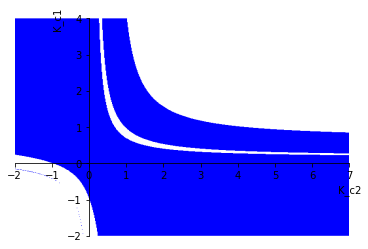

In [56]:
sympy.plot_implicit(requirements, (K_c2, -2, 7), (K_c1, -2, 4))